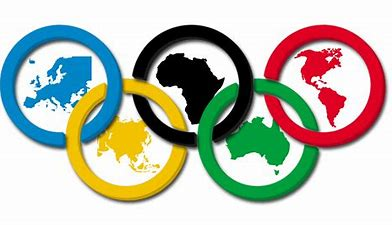




# Introduction

#### Their creation was inspired by the ancient Olympic Games  held in Olympia, Greece from the 8th century BC to the 4th century AD. Baron Pierre de Coubertin founded the International Olympic Committee (IOC) in 1894, leading to the first modern Games in Athens in 1896. The IOC is the governing body of the Olympic Movement,[definition needed] with the Olympic Charter defining its structure and authority.

#### The modern Olympic Games or Olympics (French: Jeux olympiques)[a][1] are the leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world's foremost sports competition with more than 200 nations participating.[2] The Olympic Games are normally held every four years, and since 1994, has alternated between the Summer and Winter Olympics every two years during the four-year period.

# About Dataset

#### This dataset consists of the official statistics on the 6955 athletes and 49 sports from 2000 to 2012 Olympic Games. The athletes file includes the name, nationality , date_given, age, sport, and quantity of gold, silver, and/or bronze medals won for every Olympic athlete . The events file lists the name, sport, discipline (if available), country of competitors, and year for every Olympic event .

# Attribute Information

* Nmae --- Nmae of the athletes
* Age ---  Age of the atheletes
* Country --- Name of the country
* Year --- year of the event
* Date_Given --- Date which athelet participated
* Sprots --- Which Sport athelet partcicpating
* Gold_medals --- Number of gold medals win by the individual athelet
* Silver_medal ---Number of silver medals win by the individual athelet
* Bronze_mdeal --- Number of Bronze medals win by the individual athelet 
* Toatal_medals --- Number of total medals win by the individual athelet

# How the data read according to Statistics

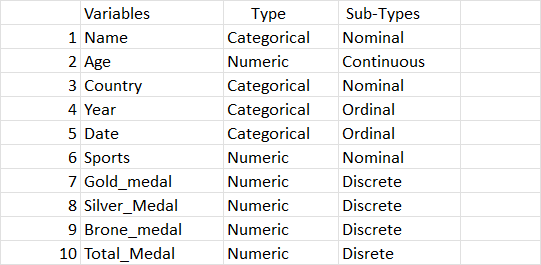

# Installing PySpark Package

In [ ]:
pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 58.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=dd752c7ee9ddd9ad4d9772a680c0bd9db48ff526d9129af7ddffcf0b761af985
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


# Importing the necessary libraries

In [ ]:
#Initializing PySpark
from pyspark.sql import functions as f
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf = conf)
spark = SparkSession.builder.appName("Test").getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
import numpy as np                                      # To perform wide variety of mathematical operations on arrays.
import pandas as pd                                     # which is used to data cleaning, processing and analysis.
import matplotlib.pyplot as plt                         # Data visualization and graphical plotting.
import seaborn as sns                                   # Making the statistical graphics.
import plotly.express as px                             # used for creating eantaire figure at once

# Reading the dataset 

In [ ]:
# Reading the csv file data
df = spark.read.format("csv").option("header","true").option("Inferschema","true").load("/content/Olympic.csv")
df.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

## Printing attributes and its data types 

In [ ]:
df.printSchema()                                                                # Checking the data types of columns in the dataset

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



## Printing the column names of the dataset

In [ ]:
col = df.columns                                                                # Retreving the columns names and stored under varible
print('List of column names: ')                                                 # Printing a define header
rdd = sc.parallelize(col)                                                       # By usinf sc parallelize function converting the data into rrd transformation
rdd.collect()                                                                   # Calling the action

List of column names: 


['name',
 'age',
 'country',
 'year',
 'Date_Given',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal']

## Getting the how many rows and how many columns in the data set

In [ ]:
row = df.count()                                                                # Counting the number of rows
columns = len(df.columns)                                                       # Counting the number of columns
print("Number of rows : ",row)
print("Number of columns: ",columns)

Number of rows :  8618
Number of columns:  10


## Checking for duplicate values

In [ ]:
# First we do groupby count of all the columns.
# Secondly we filter the rows with count greater than 1.
# Third is droping the dropinfg the duplicate values to get accuratte results.

dup = df.groupBy('name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal').count().filter("count > 1")
dup.drop("count").show()

+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|name| age|  country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+



###  * First we do groupby count of all the columns.
### *  Secondly we filter the rows with count greater than 1.
### * Third is droping the dropinfg the duplicate values to get accuratte results.

# Checking for Null Values

In [ ]:
null_values = dup.filter(dup.name.isNull())                                     # checking for null values by using isNull
null_values.show()                                                                                          

+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+-----+
|name| age|  country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|count|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+-----+
|null|null|   Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|    3|
|null|null|Argentina|2012|08-12-2012|    Hockey|         0|           1|          0|          1|    2|
+----+----+---------+----+----------+----------+----------+------------+-----------+-----------+-----+



## Filling the missing name and age columns 

In [ ]:
dup.na.fill(value="Escadinha",subset=["name"]).where(df.country == "Brazil").show()
dup.na.fill(value="Laura del Colle",subset=["name"]).where(df.country == "Argentina").show()


+---------+----+-------+----+----------+----------+----------+------------+-----------+-----------+-----+
|     name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|count|
+---------+----+-------+----+----------+----------+----------+------------+-----------+-----------+-----+
|Escadinha|null| Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|    3|
+---------+----+-------+----+----------+----------+----------+------------+-----------+-----------+-----+

+---------------+----+---------+----+----------+------+----------+------------+-----------+-----------+-----+
|           name| age|  country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|count|
+---------------+----+---------+----+----------+------+----------+------------+-----------+-----------+-----+
|Laura del Colle|null|Argentina|2012|08-12-2012|Hockey|         0|           1|          0|          1|    2|
+---------------+----+-------

In [ ]:
dup.na.fill(value=36,subset=["age"]).where(df.country == "Brazil").show()
dup.na.fill(value=28,subset=["age"]).where(df.country == "Argentina").show()

+----+---+-------+----+----------+----------+----------+------------+-----------+-----------+-----+
|name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|count|
+----+---+-------+----+----------+----------+----------+------------+-----------+-----------+-----+
|null| 36| Brazil|2012|08-12-2012|Volleyball|         0|           1|          0|          1|    3|
+----+---+-------+----+----------+----------+----------+------------+-----------+-----------+-----+

+----+---+---------+----+----------+------+----------+------------+-----------+-----------+-----+
|name|age|  country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|count|
+----+---+---------+----+----------+------+----------+------------+-----------+-----------+-----+
|null| 28|Argentina|2012|08-12-2012|Hockey|         0|           1|          0|          1|    2|
+----+---+---------+----+----------+------+----------+------------+-----------+-----------+-----+



### Filling the null values with "Escadinha/Serginho"-- "Brazil", "Laura del Colle" -- "Argentina".

* I got name of player Escadinha who won gold in 2004 and 2016 and silver in 2008 and 2012 whose name is missing in 2012 olympic Brazil-Volleyboll men team in this data.

sorce:- https://en.wikipedia.org/wiki/Volleyball_at_the_2012_Summer_Olympics_%E2%80%93_Men%27s_tournament

*  I got name of player Laura del Colle. She was in Argentina-Hockey women team. Her name is missing in the data. Therefore I filled these missing values with these 2 players name and age in respected column

sorce:-https://en.wikipedia.org/wiki/Template:2012_Summer_Olympics_Argentina_women%27s_field_hockey_team_roster

## Dealing with special characters

In [ ]:
from pyspark.sql.functions import udf                                           # Importing necessary functions

def ascii_ignore(x):                                                            # defining the function
    return x.encode('ascii', 'ignore').decode('ascii')                          # ingoring the ascii values and decoding the data

ascii_udf = udf(ascii_ignore)                                                   # storing the user define functions

df5 = df.withColumn("name_spc_removed", ascii_udf('name'))                      # selecting the column from thr dataframe to perform udf and creating new column.
df5.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+--------------------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|    name_spc_removed|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+--------------------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|      Michael Phelps|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|      Michael Phelps|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|      Michael Phelps|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|     

In [ ]:
df5.select(['name']).collect()[14]


Row(name='Marit Bjørgen')

# Printing how many Olympic Sports in the dataset.

In [ ]:
df.select("sports").distinct().count()                                          # By using distinct function to sports column fetching how many individual sports are there. 

49

Total number of sports are 49

In [ ]:
df.select("sports").distinct().show(n=49)                                       # Fetching individual sport name from the dataset

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

observation:
* There are total 49 sports events in the olympics dataset of 2000 to 2012


# Plotting the total number of medals in  each Olympic Sport

### Before sorting the data

In [ ]:
df1 = df.groupby("sports").sum("total_medal")                                   # use gruop by and sum for total metals
df1.show(n=49)

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
|          Equestrian|             182|
|            Shooting|             192|


### After sorting the data

In [ ]:
sports_grouped = df1.groupby(["sports"])["total_medal"].sum().sort_values(ascending=False)   # use gruop by and sum for total metals
sports_grouped                                                                               # show result

sports
Swimming                     765
Athletics                    753
Rowing                       576
Football                     407
Hockey                       388
Ice Hockey                   384
Handball                     351
Canoeing                     333
Waterpolo                    306
Cycling                      306
Basketball                   287
Gymnastics                   282
Volleyball                   281
Fencing                      256
Wrestling                    245
Judo                         224
Baseball                     216
Sailing                      210
Shooting                     192
Boxing                       188
Equestrian                   182
Weightlifting                180
Cross Country Skiing         174
Diving                       144
Speed Skating                140
Biathlon                     138
Short-Track Speed Skating    138
Softball                     134
Synchronized Swimming        129
Taekwondo                    112
Bad

In [ ]:
df1 = df.toPandas()                                                             # converting pyspark dataframe to pandas dataframe
df1.head()                                                                      # reading top five five rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6


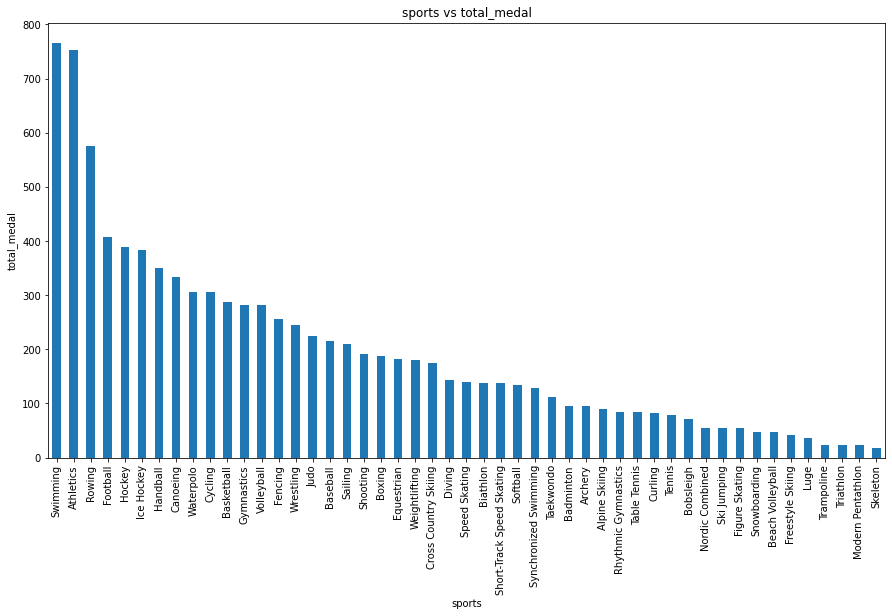

In [ ]:
sports_grouped.plot(kind='bar',                                                 # type of plot
         title='sports vs total_medal',                                         # adding title to the plot
         ylabel='total_medal',                                                  # adding y lable
         xlabel='sports',                                                       # adding x lable
         figsize=(15,8))                                                        # scaling the image to requied size

## Top 10 sports baged total medals

In [ ]:
sports_grouped = df1.groupby(["sports"])["total_medal"].sum().sort_values(ascending=False).head(10)   # use gruop by and sum for total metals
sports_grouped                                                                                        # show result

sports
Swimming      765
Athletics     753
Rowing        576
Football      407
Hockey        388
Ice Hockey    384
Handball      351
Canoeing      333
Waterpolo     306
Cycling       306
Name: total_medal, dtype: int32

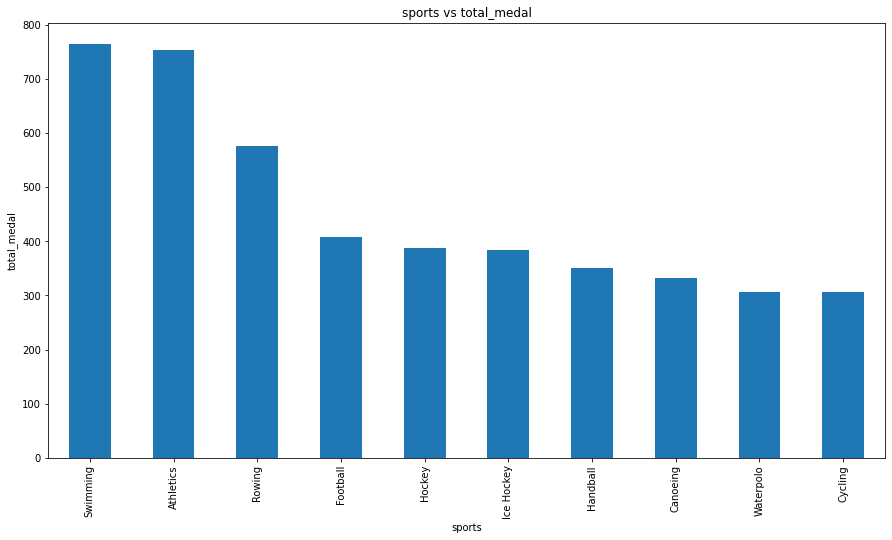

In [ ]:
sports_grouped.plot(kind='bar',                                                 # type of plot
         title='sports vs total_medal',                                         # adding title to the plot
         ylabel='total_medal',                                                  # adding y lable
         xlabel='sports',                                                       # adding x lable
         figsize=(15,8))                                                        # scaling the image to requied size

#  Sorting the result based on the total number of medals.

In [ ]:
df1 = df.groupby("sports").sum("total_medal")                                   # use gruop by and sum for total metals
sort = df1.orderBy(f.desc("sum(total_medal)"))                                  # use order by for ordering and also use desc or descending ordering 
sort.show(n = 49)                                                               # show result

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|            Swimming|             765|
|           Athletics|             753|
|              Rowing|             576|
|            Football|             407|
|              Hockey|             388|
|          Ice Hockey|             384|
|            Handball|             351|
|            Canoeing|             333|
|           Waterpolo|             306|
|             Cycling|             306|
|          Basketball|             287|
|          Gymnastics|             282|
|          Volleyball|             281|
|             Fencing|             256|
|           Wrestling|             245|
|                Judo|             224|
|            Baseball|             216|
|             Sailing|             210|
|            Shooting|             192|
|              Boxing|             188|
|          Equestrian|             182|
|       Weightlifting|             180|


Observation :
* From above oputput swimmimg sport event won the most medals and followed by Atheletics,rowing.

# Total number of medals won by each country in swimming.

In [ ]:
Filtering_data = df.filter(df.sports == "Swimming")                                                         # filtering  swimming sport rows from data
grouping_data = Filtering_data.groupby("country").sum("total_medal").orderBy(f.desc("sum(total_medal)"))    # grouping by each country and arranging the data in descending order
total_count = grouping_data.count()                                                                         # counting the grouped data
grouping_data.show(total_count)                                                                             # printing the total count of grouoed data.

+-------------------+----------------+
|            country|sum(total_medal)|
+-------------------+----------------+
|      United States|             267|
|          Australia|             163|
|        Netherlands|              46|
|              Japan|              43|
|             France|              39|
|              China|              35|
|            Germany|              32|
|             Russia|              20|
|              Italy|              16|
|      Great Britain|              11|
|       South Africa|              11|
|             Sweden|               9|
|            Hungary|               9|
|             Brazil|               8|
|            Ukraine|               7|
|           Zimbabwe|               7|
|            Romania|               6|
|             Canada|               5|
|        South Korea|               4|
|             Poland|               3|
|            Austria|               3|
|            Tunisia|               3|
|              Spain|    

Observation: 
* In the swimming sport United states toped the medals list and follwed by Australia,Netherland the medal list

# Total number of medals won by each country in Skeleton.

In [ ]:
Filtering_data = df.filter(df.sports == "Skeleton")                                                         # filtering  Skeleton sport rows from data
grouping_data = Filtering_data.groupby("Country").sum("total_medal").orderBy(f.desc("sum(total_medal)"))    # grouping by each country and arranging the data in descending order
total_count = grouping_data.count()                                                                         # counting the grouped data
grouping_data.show(total_count)                                                                             # printing the total count of grouoed data.

+-------------+----------------+
|      Country|sum(total_medal)|
+-------------+----------------+
|       Canada|               4|
|Great Britain|               3|
|  Switzerland|               3|
|United States|               3|
|      Germany|               2|
|       Russia|               1|
|      Austria|               1|
|       Latvia|               1|
+-------------+----------------+



Observation: 
* In the skeleton game Canada toped and follwed by Great Britain,Switzerland the medal list.

#  Number of medals that the United States won yearly.

In [ ]:
Filtering_data = df.filter(df.country == "United States")                                                   # filtering  United States rows from data
grouping_data = Filtering_data.groupby("year").sum("total_medal").orderBy(f.desc("sum(total_medal)"))       # grouping by each country and arranging the data in descending order
total_count = grouping_data.count()                                                                         # counting the grouped data
grouping_data.show(total_count)                                                                             # printing the total count of grouoed data.

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2008|             317|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2002|              84|
|2006|              52|
+----+----------------+



Observation: 
* In the year 2008is 317 most number of medals won by the athelets. 
* Least meadls won in the year of 2006 is 52

# Total number of medals won by each country.

In [ ]:
df1 = df.groupby("country").sum("total_medal")                                   # use gruop by and sum for total metals
sort = df1.orderBy(f.desc("sum(total_medal)"))                                   # use order by for ordering and also use desc or descending ordering 
sort.show(n = 110)                                                               # show result

+--------------------+----------------+
|             country|sum(total_medal)|
+--------------------+----------------+
|       United States|            1312|
|              Russia|             768|
|             Germany|             629|
|           Australia|             609|
|               China|             530|
|              Canada|             370|
|               Italy|             331|
|       Great Britain|             322|
|              France|             318|
|         Netherlands|             318|
|         South Korea|             308|
|               Japan|             282|
|              Brazil|             221|
|               Spain|             205|
|              Norway|             192|
|                Cuba|             188|
|              Sweden|             181|
|             Hungary|             145|
|             Ukraine|             143|
|           Argentina|             141|
|             Romania|             123|
|             Finland|             118|


Observation: 
* From the output we can observe that top three medal winning countries
* 1) United States
* 2) Russia
* 3) Germany
#### are the most medals winning countries.
#### Bottom three countries are
* 1)Mozambique
* 2)Syria
* 3)Mauritius

# The oldest athlete in the olympics

In [ ]:
max_age = df.agg({"age":"max"})                                                 # By using max in aggreat function fetching the max value from the age column
max_age.show()                                                                  # Printing the data

+--------+
|max(age)|
+--------+
|      61|
+--------+



Observation: 
* 61 is the maximum age from the given dataset

In [ ]:
oldest_athelet = df.filter(df.age == 61)                                        # Filtering the data where age is 61 from the data set
oldest_athelet.show()                                                           # Printing the result

+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar| 61| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+



Observation: 
* The oldest person is 61 years old and his name is "Ian Millar" 

# Which country was he/she from?

In [ ]:
oldest_athelet = df.filter(df.age == 61)                                        # Filtering the data where age is 61 from the data set
oldest_athelet.show()                                                           # Printing the result

+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name|age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar| 61| Canada|2008| 8/24/2008|Equestrian|         0|           1|          0|          1|
+----------+---+-------+----+----------+----------+----------+------------+-----------+-----------+



Observation:
* From the above output we can say that Ian Millar is from "CANADA"

# conclusion 

* Performed basic Exploration of Data Analysis, checked how many rows and column dataset have. Handel with duplicate values deleted them to get effective results and dealed with missing values, identified and filled with the data taken from the webiste.

* leaned how to handel special character and how to convert them from non ascii to ascii.

* Performed numerical measures and find out the howmnay individual participents are there and how many countries are participated and how many sports events are there.

* Seen the top 10 countries who won the gold,silver,bronze,total_medals.

  1) we observe that in every medal list United States of America toped the list.
  2) Russia in the second place in winning the most medals after USA.
  3) Germany in the third place in winning the most medals after Russia.
* Performed data visualization plot bar, box, count plots from this plots it is very eassy and convinient to read and understand the data.


